# 3 Modeling Random Walks

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

In [3]:
#import packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
import seaborn as sns
sns.set_style('darkgrid')

## Random Walk

A **Random Walk** is a sequence of probabilistic values $\{S_t\}_{t\geq 1}$ where $S_t = z_1 + z_2 +\cdots + z_t$ and $z_1,z_2,\ldots,z_t$ is a independent and identically distributed random variable.

In [19]:
# write a function that designs a random walk by randomly selecting values from a set of numbers
def random_walk(n, steps, probs):
    """
    Simulate a random walk of length n using step values and their probabilities.

    Parameters:
        n: Number of steps in the walk.
        steps (array): Possible step values (e.g., [-1, 1]).
        probs (array): Corresponding probabilities for each step.

    Returns:
        np.ndarray: Array representing the random walk.
    """
    draws = np.random.choice(steps, size =n, p = probs)
    return np.cumsum(draws)

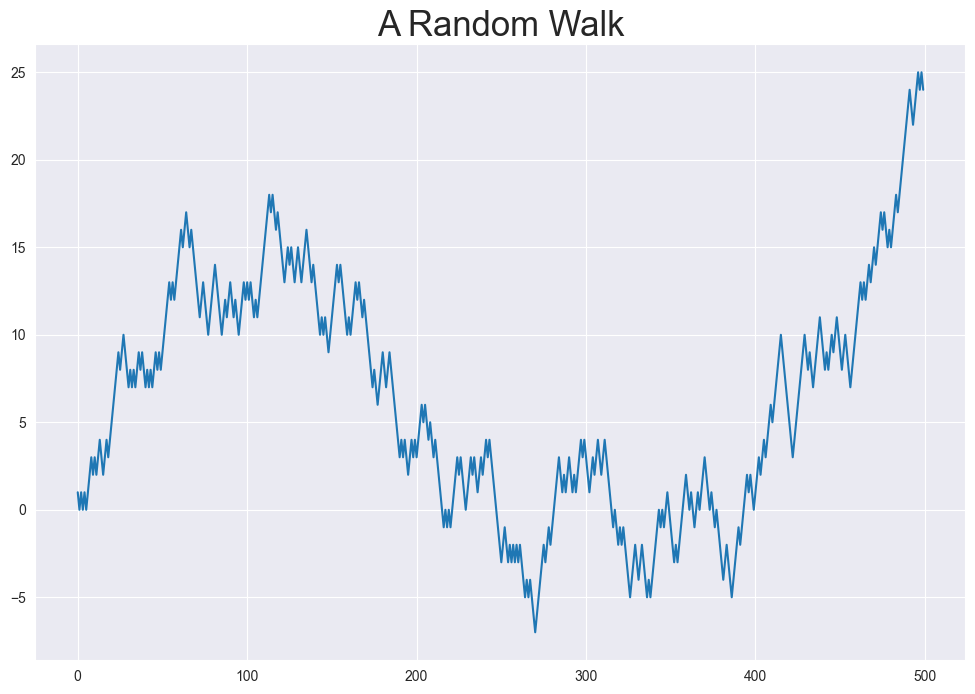

In [21]:
#Code and plot a random walk

# Create an array of length 500 of randomly choosing 1 and -1 with equal probability
n = 500
steps = [1,-1]
probs = [.5,.5]


#Create the array of the random walk
r_walk = random_walk(n,steps,probs)

#plot the random walk
plt.figure(figsize=(12, 8))
plt.plot(r_walk)
plt.title('A Random Walk', size = 25)
plt.show()

## Expected value and variance of random walk

Let $S_t = z_1 +z_2 + \cdots + z_t$ be a random walk.
   - The expected value of $S_t$ is $tE(z_i)$.
   - The variance of $S_t$ is $t\mbox{Var}(z_i)$.

## Generalized Random Walk

A **generalized random walk** is a sequence of probabilistic values $S_t = r_1 + r_2 +\cdots + r_t$ so that $r_i = \mu + \sigma z_i$ and $z_1,\ldots,z_t$ are i.i.d. random variables. 

In [22]:
#Write a function that generates a generalized random walk with z_i the standard normal distribution

import numpy as np

def generalized_random_walk(n, mu, sigma):
    """
    Simulate a generalized random walk of length n with normal increments.

    Each step is drawn from a normal distribution with mean `mu` and standard deviation `sigma`.

    Parameters:
        n: Number of steps in the random walk.
        mu: Mean of each increment.
        sigma: Standard deviation of each increment.

    Returns:
        np.ndarray: Array representing the generalized random walk.
    """
    #create array of randomly selected values from normal distribution
    steps = mu+sigma*np.random.normal(loc =0, scale = 1, size =n)
    return np.cumsum(steps)


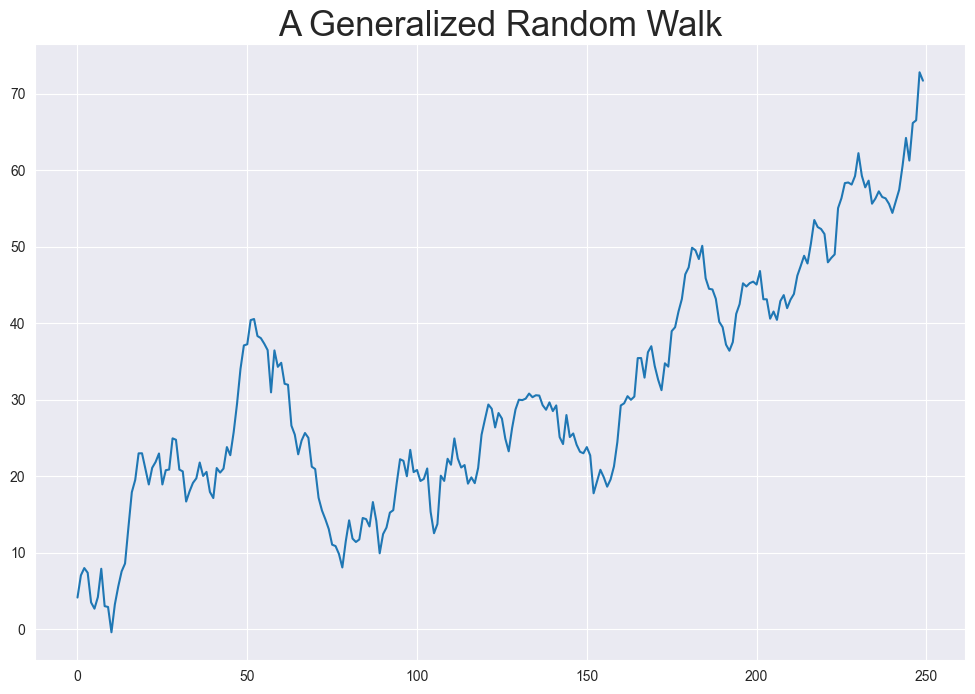

In [25]:
#Create a generalized random walk
g_r_walk = generalized_random_walk(250, .4, 2.3)

#plot the generalized random walk
plt.figure(figsize=(12, 8))
plt.plot(g_r_walk)
plt.title('A Generalized Random Walk', size = 25)
plt.show()

## Expected value and variance of generalized random walk

Let $S_t = r_1 +r_2 + \cdots + r_t$, $r_i = \mu + \sigma z_i$ be a generalized random walk with $z_i$ the normal distribution.
   - The expected value of $S_t$ is $t\mu$.
   - The variance of $S_t$ is $t\sigma^2$.

## Random Walks with Correlation Between Successive Steps

Random walks can be extended to incorporate correlation between steps using **autoregressive** and **moving average** models.

### Autoregressive (AR) Model

An autoregressive model of order $p$, denoted AR($p$), defines a random walk via

$$
S_t = r_1 + r_2 + \cdots + r_t,
$$

where each return $r_i$ satisfies

$$
r_i = c_0 + c_1 r_{i-1} + \cdots + c_p r_{i-p} + \sigma z_i,
$$

The condition $|c_1+c_2+\cdots + c_p|<1$ insures that the random walk process will have the revert to mean property.

with $ z_i \sim \mathcal{N}(0, 1) $. The process is **stationary**, meaning $ E[r_i] = E[r_j]$ and $\mbox{Var}(r_i)=\mbox{Var}(r_j)$ for all $i, j$.


The AR($1$) random walk has steps that are modeled by
$$ r_t = \mu + c_1(r_{t-1}-\mu) + \sigma z_t.$$




### Moving Average (MA) Model

A moving average model of order $q$, denoted MA($q$), takes the form

$$
S_t = r_1 + r_2 + \cdots + r_t,
$$

where

$$
r_i = \mu + \sigma z_i + \phi_1 z_{i-1} + \cdots + \phi_q z_{i-q},
$$

with each $z_i$ the standard normal distribution.

### ARMA Model

An ARMA($p, q$) model combines both components:

$$
S_t = r_1 + r_2 + \cdots + r_t,
$$

where

$$
r_i = c_0 + c_1 r_{i-1} + \cdots + c_p r_{i-p} + \sigma z_i + \phi_1 z_{i-1} + \cdots + \phi_q z_{i-q}.
$$

### Key Interpretations

- **Moving Average (MA)**: Past **shocks** (random noise) influence current returns.
- **Autoregressive (AR)**: Past **returns** influence future returns and models mean reversion.


In [26]:
#Write a function that defines an ARMA(1,1) random walk model

import numpy as np

def arma_11_random_walk(n, mu, c, phi, sigma):
    """
    Simulate an ARMA(1,1) process: r_t = mu+ c * (r_{t-1}-mu)  + phi * z_{t-1} + sigma * z_t
    
    Parameters:
        n (int): Number of time steps to simulate.
        mu: mean of each increment
        c (float): autoregressive coefficient.
        phi (float): Moving average coefficient.
        sigma (float): Standard deviation of random noise in each step.
    
    Returns:
        np.ndarray: Simulated ARMA(1,1) time series.
    """
    
    #Create an array of the z_t's
    noise = np.random.normal(size = n)
    
    # create array of zeros to be filled in by the random walk
    steps = np.zeros(n)
    
    #Initialize the first step
    steps[0] = mu + sigma*noise[0]
    
    #Fill in rest of the steps
    for t in range(1,n):
        steps[t] = mu + c*(steps[t-1]-mu) + phi*noise[t-1] + sigma*noise[t]
    
    
    
    return np.cumsum(steps)


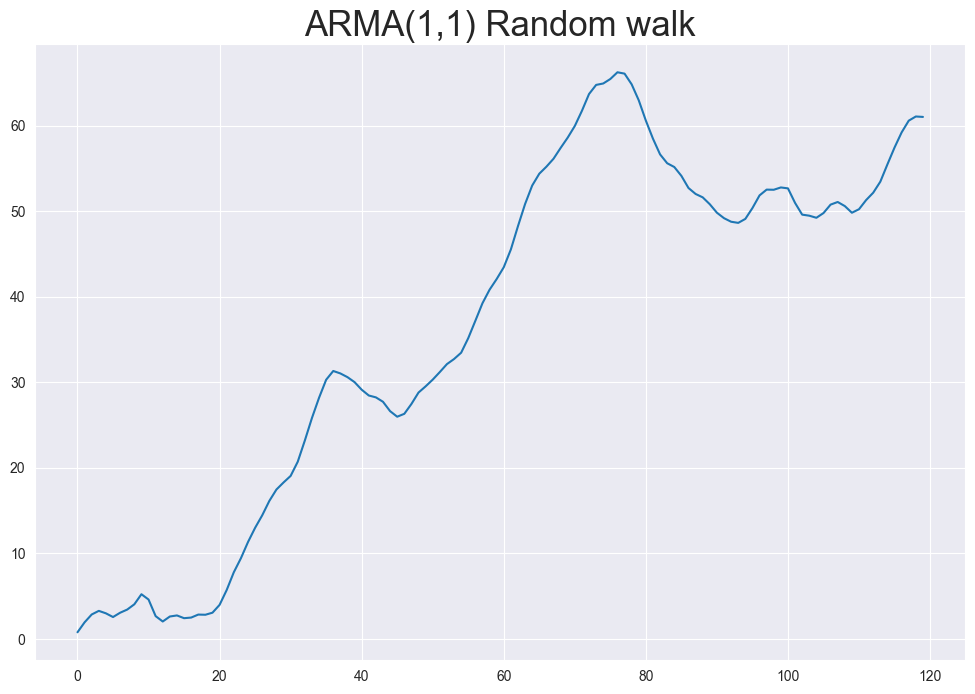

In [35]:
#Create an ARMA(1,1) random walk
arma_walk = arma_11_random_walk(120, .2, .8, .4, .5)


#Plot an ARMA(1,1) random walk
plt.figure(figsize = (12,8))
plt.plot(arma_walk)
plt.title('ARMA(1,1) Random walk', size = 25)
plt.show()